<a href="https://colab.research.google.com/github/ChoSanghyuk/EncoreProject/blob/master/daum_tf_idf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
from future.utils import iteritems
from collections import Counter
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving daum_crawling_long.csv to daum_crawling_long.csv


In [ ]:
data = pd.read_csv('daum_crawling_long.csv')

# 띄어쓰기 단위로 분리해서 리스트 형식으로 만들기
word= data['Content'][0].split(' ')
for i in range(1, len(data)):
    word += data['Content'][i].split(' ')
word

In [ ]:
#단어 빈도
counts = Counter(word)
#단어빈도 기준 내림차순 정렬
vocab = sorted(counts, key=counts.get, reverse=True)

In [ ]:
# 단어들에 번호를 매겨 그 번호와 그 단어를 dictionary로 저장
word_dic = {word.encode("utf8").decode("utf8"): ii for ii, word in enumerate(vocab,1)}
word_dic

In [ ]:
# index가 key가 되도록 순서를 바꿈
idx2word = {ii: word for ii, word in enumerate(vocab)}
#idx2word

In [ ]:
tfidf = TfidfVectorizer(max_features = 40, max_df=0.95, min_df=0) # max_features 단어 40개  , min_df : 최소 빈도값

#generate tf-idf term-document matrix
A_tfidf_sp = tfidf.fit_transform(vocab)

In [ ]:
tfidf_dict = tfidf.get_feature_names()
print(tfidf_dict)

['2번의', '갑시다', '마라', '외면한', '우리', '우리나라', '울어도', '웃기고들', '원칙대로', '원칙이', '위해서', '읍서', '응시', '응시대상자에게', '응시자들만', '응시하지', '의대생', '의대생들', '의대생들ㆍ국시는', '의대생들이', '의대생이네', '의대정원을', '의레기', '의사', '의사가', '의사되길', '의사된다는게', '의사들', '이메일', '이미', '이슈', '이전에', '인거지', '인력들은', '인생', '인재들', '인지', '일년동안', '일시킬', '일이']


In [ ]:

data_array = A_tfidf_sp.toarray()
data = pd.DataFrame(data_array, columns=tfidf_dict)
#data.shape

In [ ]:
# TF-IDF score TOP 100 단어 시각화 
tsne = TSNE(n_components=3, n_iter=10000, verbose=1) # 단어 임베딩을 위한 차원 수 2개, 최적화를위한 최대 반복 횟수 10000(250이상 필)
data_array.shape
data_array.T.shape

(40, 433)

In [ ]:

Z = tsne.fit_transform(data_array.T)

[t-SNE] Computing 39 nearest neighbors...
[t-SNE] Indexed 40 samples in 0.000s...
[t-SNE] Computed neighbors for 40 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 40 / 40
[t-SNE] Mean sigma: 0.143076
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.390583
[t-SNE] KL divergence after 10000 iterations: 0.614148


In [ ]:
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 11 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 144676 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


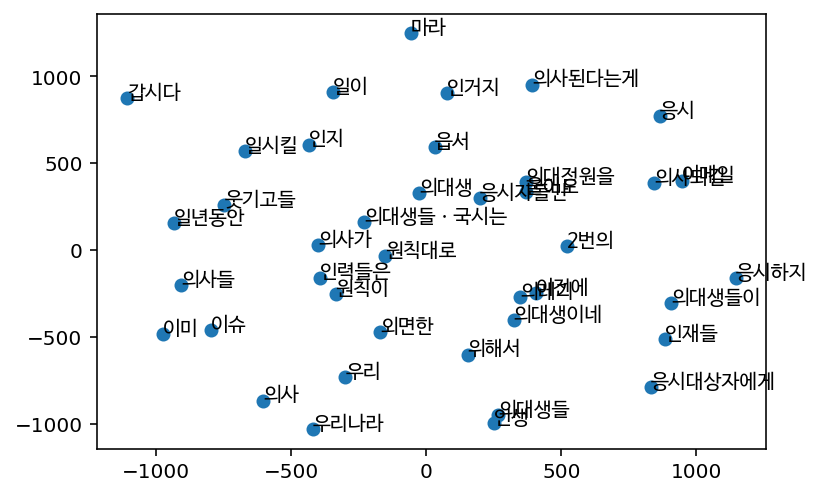

In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=10)
plt.scatter(Z[:,0], Z[:,1])
for i in range(len(tfidf_dict)):
    plt.annotate(s=tfidf_dict[i].encode("utf-8").decode("utf-8"), xy=(Z[i,0], Z[i,1]),fontProperties =fontprop)

plt.draw()